# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []



In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

appid=weather_api_key
units="metric"

# Create counters
record_count = 1
set_count = 1

# Calculate Total set
set_size = 50
total_set=len(cities)//set_size
remaining=len(cities) - total_set*set_size
set_size_print=set_size

if remaining> 0:
    total_set+=1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % set_size == 0 and i >= set_size):
        set_count += 1
        record_count = 1
    if remaining > 0 and set_count==total_set:
        set_size_print=remaining

    # Create endpoint URL with each city
    params={"q":city,
           "appid":appid,
           "units":units}
    
    
    # Log the url, record, and set numbers
    print("Processing Record %02d/%s of Set %s/%s | %s" % (record_count,set_size_print, set_count,total_set, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url,params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.datetime.fromtimestamp(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}.")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 01/50 of Set 1/13 | sawakin
Processing Record 02/50 of Set 1/13 | songea
Processing Record 03/50 of Set 1/13 | waitangi
Processing Record 04/50 of Set 1/13 | golhisar
Processing Record 05/50 of Set 1/13 | blackmans bay
Processing Record 06/50 of Set 1/13 | wailua homesteads
Processing Record 07/50 of Set 1/13 | mccook
Processing Record 08/50 of Set 1/13 | beya
Processing Record 09/50 of Set 1/13 | college
Processing Record 10/50 of Set 1/13 | isafjordur
Processing Record 11/50 of Set 1/13 | dudinka
Processing Record 12/50 of Set 1/13 | fort bragg
Processing Record 13/50 of Set 1/13 | adamstown
Processing Record 14/50 of Set 1/13 | alesund
Processing Record 15/50 of Set 1/13 | batticaloa
Processing Record 16/50 of Set 1/13 | ilulissat
Processing Record 17/50 of Set 1/13 | bredasdorp
Processing Record 18/50 of Set 1/13 | tadine
Processing Record 19/50 of Set 1/13 | arraial do cabo
Processing Record 20/50 of Set

Processing Record 14/50 of Set 4/13 | juneau
Processing Record 15/50 of Set 4/13 | brandon
Processing Record 16/50 of Set 4/13 | pskov
Processing Record 17/50 of Set 4/13 | bicas
Processing Record 18/50 of Set 4/13 | brady
Processing Record 19/50 of Set 4/13 | port saint john's
Processing Record 20/50 of Set 4/13 | malindi
Processing Record 21/50 of Set 4/13 | mangrol
Processing Record 22/50 of Set 4/13 | zahedan
Processing Record 23/50 of Set 4/13 | vila franca do campo
Processing Record 24/50 of Set 4/13 | saipan
Processing Record 25/50 of Set 4/13 | lihue
Processing Record 26/50 of Set 4/13 | beau vallon
Processing Record 27/50 of Set 4/13 | puerto ayora
Processing Record 28/50 of Set 4/13 | paracuru
Processing Record 29/50 of Set 4/13 | ulladulla
Processing Record 30/50 of Set 4/13 | margate
Processing Record 31/50 of Set 4/13 | kruisfontein
Processing Record 32/50 of Set 4/13 | chalus
Processing Record 33/50 of Set 4/13 | arcos
Processing Record 34/50 of Set 4/13 | mukah
City not 

Processing Record 31/50 of Set 7/13 | tamanrasset
Processing Record 32/50 of Set 7/13 | ciudad lazaro cardenas
Processing Record 33/50 of Set 7/13 | mar del plata
Processing Record 34/50 of Set 7/13 | zhanaozen
Processing Record 35/50 of Set 7/13 | xiazhen
Processing Record 36/50 of Set 7/13 | charters towers
Processing Record 37/50 of Set 7/13 | saveh
Processing Record 38/50 of Set 7/13 | constantia
Processing Record 39/50 of Set 7/13 | roswell
Processing Record 40/50 of Set 7/13 | gallivare
City not found. Skipping... Error: 'coord'.
Processing Record 41/50 of Set 7/13 | loango
Processing Record 42/50 of Set 7/13 | nuuk
Processing Record 43/50 of Set 7/13 | lae
Processing Record 44/50 of Set 7/13 | mata-utu
Processing Record 45/50 of Set 7/13 | kangding
Processing Record 46/50 of Set 7/13 | talnakh
Processing Record 47/50 of Set 7/13 | guiratinga
Processing Record 48/50 of Set 7/13 | rio gallegos
Processing Record 49/50 of Set 7/13 | arauca
Processing Record 50/50 of Set 7/13 | mersa

Processing Record 44/50 of Set 10/13 | nikolayevsk-on-amure
Processing Record 45/50 of Set 10/13 | puerto carreno
Processing Record 46/50 of Set 10/13 | axim
Processing Record 47/50 of Set 10/13 | tsiombe
Processing Record 48/50 of Set 10/13 | sao raimundo nonato
Processing Record 49/50 of Set 10/13 | tarasovskiy
Processing Record 50/50 of Set 10/13 | vilyuysk
Processing Record 01/50 of Set 11/13 | chimbote
Processing Record 02/50 of Set 11/13 | makakilo city
Processing Record 03/50 of Set 11/13 | la sarre
Processing Record 04/50 of Set 11/13 | neryungri
Processing Record 05/50 of Set 11/13 | bassar
Processing Record 06/50 of Set 11/13 | merizo village
Processing Record 07/50 of Set 11/13 | cova figueira
Processing Record 08/50 of Set 11/13 | st. john's
Processing Record 09/50 of Set 11/13 | sadjoavato
City not found. Skipping... Error: 'coord'.
Processing Record 10/50 of Set 11/13 | coweta
Processing Record 11/50 of Set 11/13 | yanchep
Processing Record 12/50 of Set 11/13 | barra
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sawakin,19.1059,37.3321,31.89,61,0,3.06,SD,2023-09-29 15:52:29
1,songea,-10.6833,35.6500,18.64,82,40,3.09,TZ,2023-09-29 15:52:30
2,waitangi,-43.9535,-176.5597,8.79,79,96,2.68,NZ,2023-09-29 15:52:31
3,golhisar,37.1459,29.5088,17.79,65,0,0.27,TR,2023-09-29 15:52:31
4,blackmans bay,-43.0167,147.3167,11.52,72,88,3.64,AU,2023-09-29 15:52:32


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sawakin,19.1059,37.3321,31.89,61,0,3.06,SD,2023-09-29 15:52:29
1,songea,-10.6833,35.6500,18.64,82,40,3.09,TZ,2023-09-29 15:52:30
2,waitangi,-43.9535,-176.5597,8.79,79,96,2.68,NZ,2023-09-29 15:52:31
3,golhisar,37.1459,29.5088,17.79,65,0,0.27,TR,2023-09-29 15:52:31
4,blackmans bay,-43.0167,147.3167,11.52,72,88,3.64,AU,2023-09-29 15:52:32


### Create the Scatter Plots Requested


In [9]:
# Function for ploting scatter plot
def plotting_scatter_plot(x,y,
                          x_label,y_label,title,
                         edgecolors='black',c="b"):
    # Build scatter plot
    plt.scatter(x,y,edgecolors=edgecolors,c=c)
    # Incorporate the other graph properties
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    

#### Latitude Vs. Temperature

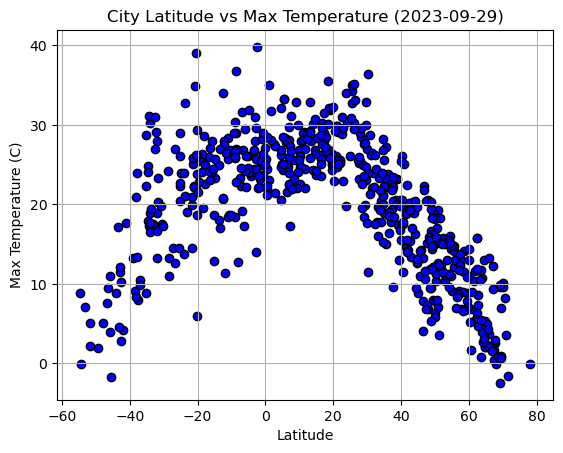

In [10]:
# Build scatter plot for latitude vs. temperature
plotting_scatter_plot(city_data_df["Lat"],city_data_df["Max Temp"],
                      "Latitude","Max Temperature (C)",
                      f"City Latitude vs Max Temperature ({city_data_df.loc[0,'Date'].split()[0]})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

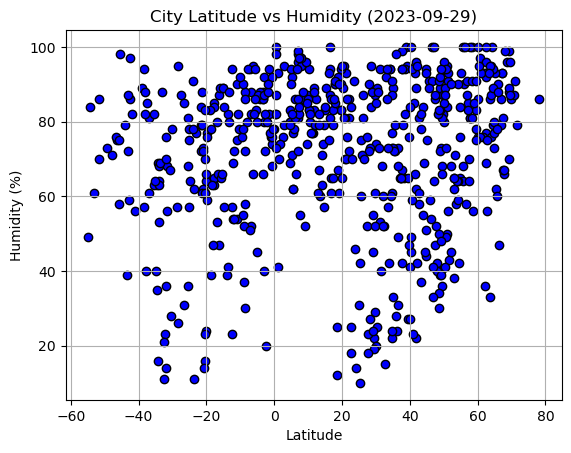

In [11]:
# Build scatter plot for latitude vs. Humidity
plotting_scatter_plot(city_data_df["Lat"],city_data_df["Humidity"],
                     "Latitude","Humidity (%)",
                     f"City Latitude vs Humidity ({city_data_df.loc[0,'Date'].split()[0]})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

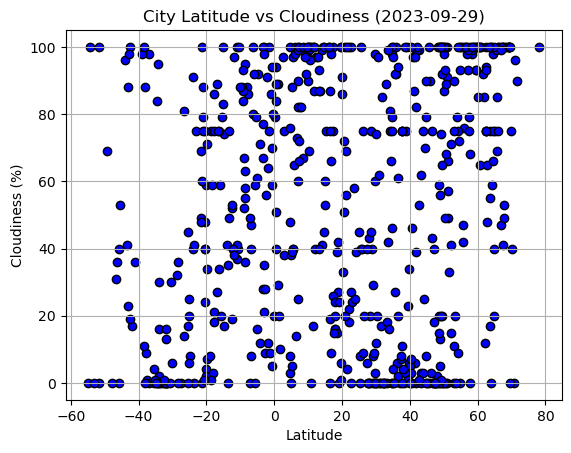

In [12]:
# Build scatter plot for latitude vs. Cloudiness
plotting_scatter_plot(city_data_df["Lat"],city_data_df["Cloudiness"],
                     "Latitude","Cloudiness (%)",
                     f"City Latitude vs Cloudiness ({city_data_df.loc[0,'Date'].split()[0]})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed

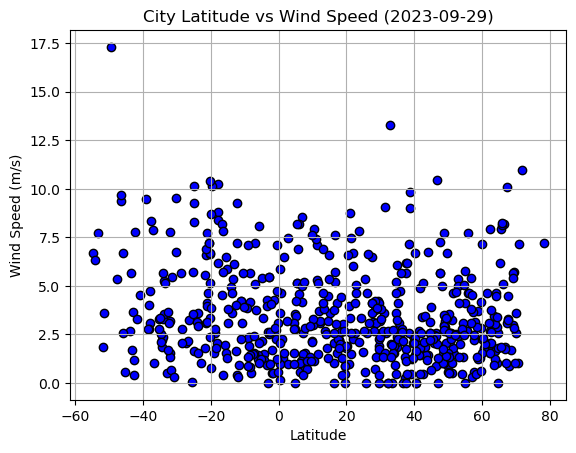

In [13]:
# Build scatter plot for latitude vs. Cloudiness
plotting_scatter_plot(city_data_df["Lat"],city_data_df["Wind Speed"],
                     "Latitude","Wind Speed (m/s)",
                     f"City Latitude vs Wind Speed ({city_data_df.loc[0,'Date'].split()[0]})")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

### Compute Linear Regression for Each Relationship

In [14]:
# Define a function for ploting Linear Regression Plot
def linear_reg_plot(x_values,y_values,anotation_percentage_x=0.4,anotation_percentage_y=0.1,
                    line_color="r-",anotation_color="red",anotation_fontsize=15):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The r-value is: {rvalue} \nThe r-squared value is: {rvalue**2}")
        
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,line_color)
    
    # Calculate best-fit coordinates
    
    # Adjust the position of anotation x-coordinate
    best_fit_x = max(x_values) - anotation_percentage_x * (max(x_values) - min(x_values))
    # Adjust the position of anotation y-coordinate
    best_fit_y = max(y_values) - anotation_percentage_y * (max(y_values) - min(y_values))  
    
    plt.annotate(line_eq,(best_fit_x,best_fit_y),fontsize=anotation_fontsize,color=anotation_color)

In [15]:
# Northern Hemisphere data:
north_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0),:].reset_index()

# Southern Hemisphere data:
south_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0),:].reset_index()

print(f"{len(north_hemi_df)} {len(south_hemi_df)}")

409 188


#### Temperature (C) vs. Latitude

The r-value is: -0.8472833889339808 
The r-squared value is: 0.7178891411634514


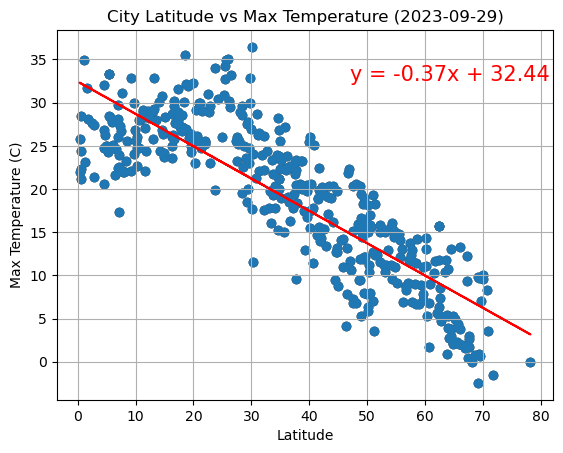

In [16]:
# Linear regression on Northern Hemisphere
plotting_scatter_plot(north_hemi_df["Lat"],north_hemi_df["Max Temp"],
                     "Latitude","Max Temperature (C)",
                      f"City Latitude vs Max Temperature ({north_hemi_df.loc[0,'Date'].split()[0]})")
linear_reg_plot(north_hemi_df["Lat"],north_hemi_df["Max Temp"])

The r-value is: 0.6546162620747253 
The r-squared value is: 0.4285224505726855


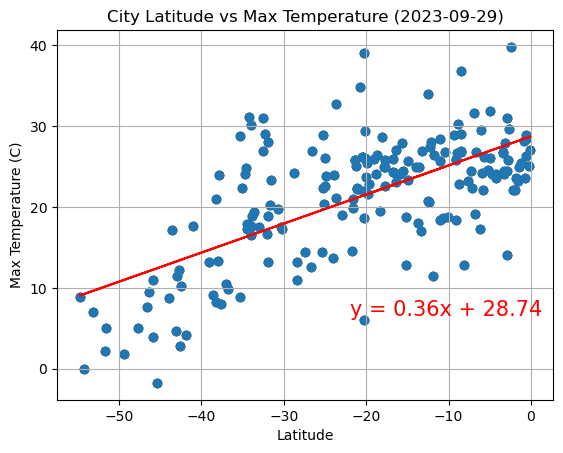

In [17]:
# Linear regression on Northern Hemisphere
plotting_scatter_plot(south_hemi_df["Lat"],south_hemi_df["Max Temp"],
                     "Latitude","Max Temperature (C)",
                      f"City Latitude vs Max Temperature ({south_hemi_df.loc[0,'Date'].split()[0]})")
linear_reg_plot(south_hemi_df["Lat"],south_hemi_df["Max Temp"],anotation_percentage_y=0.8)

#### Latitude Vs. Humidity

The r-value is: 0.009756310443364412 
The r-squared value is: 9.518559346730148e-05


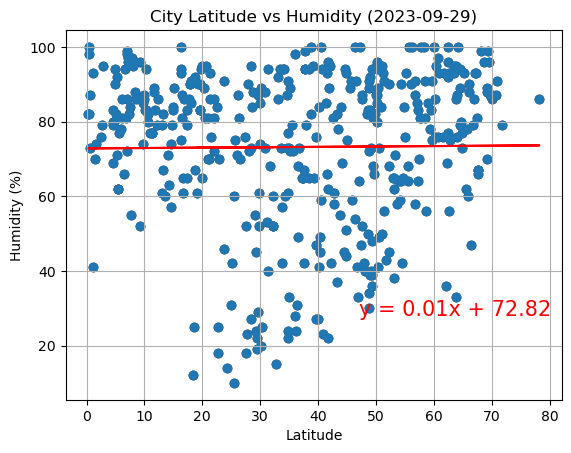

In [18]:
# Linear regression on Northern Hemisphere
plotting_scatter_plot(north_hemi_df["Lat"],north_hemi_df["Humidity"],
                     "Latitude","Humidity (%)",
                     f"City Latitude vs Humidity ({north_hemi_df.loc[0,'Date'].split()[0]})")
linear_reg_plot(north_hemi_df["Lat"],north_hemi_df["Humidity"],anotation_percentage_y=0.8)

The r-value is: 0.15646106106437094 
The r-squared value is: 0.02448006362938881


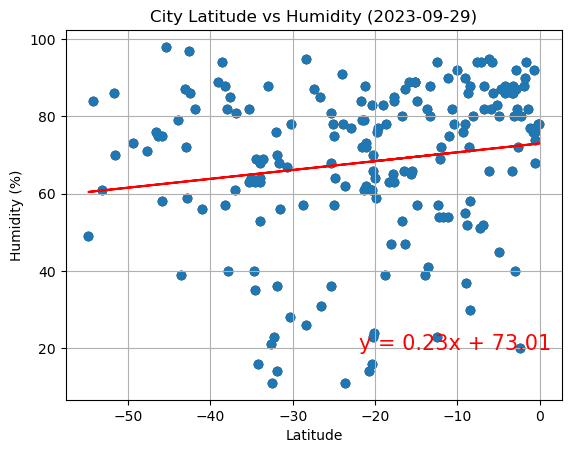

In [19]:
# Linear regression on Southern Hemisphere
plotting_scatter_plot(south_hemi_df["Lat"],south_hemi_df["Humidity"],
                     "Latitude","Humidity (%)",
                     f"City Latitude vs Humidity ({south_hemi_df.loc[0,'Date'].split()[0]})")
linear_reg_plot(south_hemi_df["Lat"],south_hemi_df["Humidity"],anotation_percentage_y=0.9)

#### Latitude vs. Cloudiness

The r-value is: 0.08654641522194849 
The r-squared value is: 0.007490281987769917


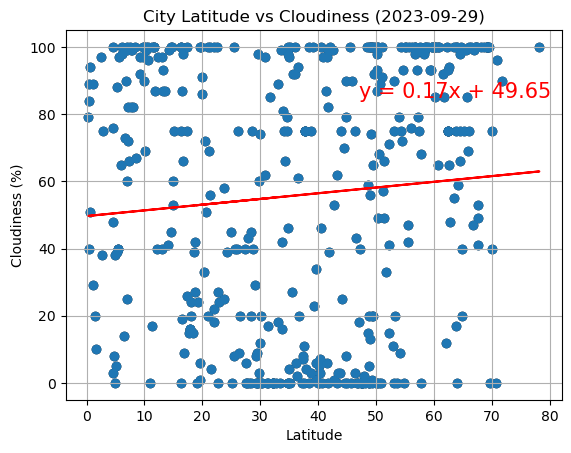

In [20]:
# Linear regression on Northern Hemisphere
plotting_scatter_plot(north_hemi_df["Lat"],north_hemi_df["Cloudiness"],
                     "Latitude","Cloudiness (%)",
                     f"City Latitude vs Cloudiness ({north_hemi_df.loc[0,'Date'].split()[0]})")

linear_reg_plot(north_hemi_df["Lat"],north_hemi_df["Cloudiness"],anotation_percentage_y=0.15)

The r-value is: 0.2806826676686629 
The r-squared value is: 0.07878275992959706


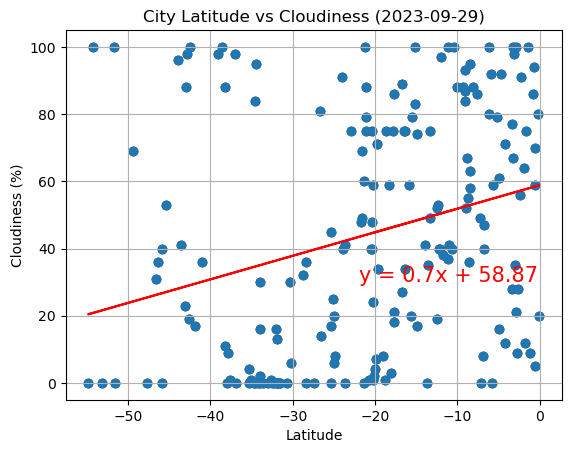

In [21]:
# Linear regression on Southern Hemisphere
plotting_scatter_plot(south_hemi_df["Lat"],south_hemi_df["Cloudiness"],
                     "Latitude","Cloudiness (%)",
                     f"City Latitude vs Cloudiness ({south_hemi_df.loc[0,'Date'].split()[0]})")

linear_reg_plot(south_hemi_df["Lat"],south_hemi_df["Cloudiness"],anotation_percentage_y=0.7)

#### Latitude vs. Wind Speed

The r-value is: -0.004042207912023749 
The r-squared value is: 1.6339444804027396e-05


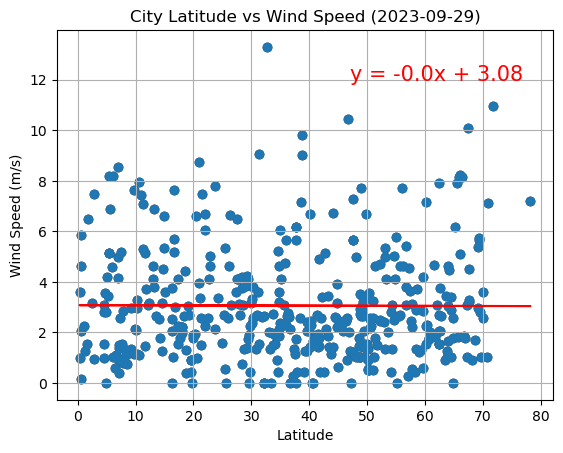

In [22]:
# Linear regression on Northern Hemisphere
plotting_scatter_plot(north_hemi_df["Lat"],north_hemi_df["Wind Speed"],
                     "Latitude","Wind Speed (m/s)",
                     f"City Latitude vs Wind Speed ({north_hemi_df.loc[0,'Date'].split()[0]})")
linear_reg_plot(north_hemi_df["Lat"],north_hemi_df["Wind Speed"])


The r-value is: -0.22553616542690272 
The r-squared value is: 0.05086656191547123


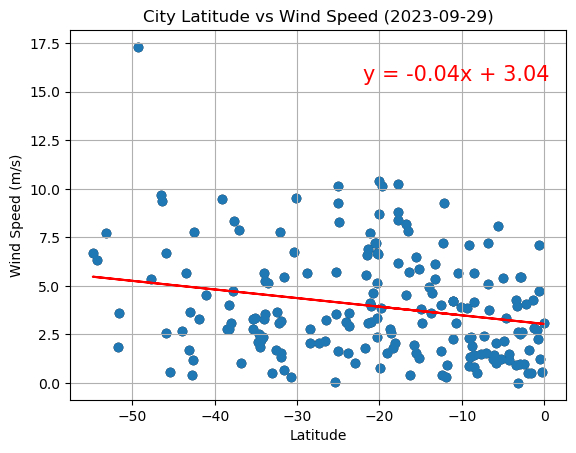

In [23]:
# Linear regression on Southern Hemisphere
plotting_scatter_plot(south_hemi_df["Lat"],south_hemi_df["Wind Speed"],
                     "Latitude","Wind Speed (m/s)",
                     f"City Latitude vs Wind Speed ({south_hemi_df.loc[0,'Date'].split()[0]})")
linear_reg_plot(south_hemi_df["Lat"],south_hemi_df["Wind Speed"])

**Discussion about the linear relationship:**
- There is a strong relationship between the max temperature and the city latitude. For instant, the max temperature increases when the latitude decreases (for the Northern hemisphere) or increases (for the Southern hemisphere).
- The relationships between the city latitude with other factors (humidity, cloudiness, and wind speed) show a weak correlation. This could be these factors are influenced by various factors like temperature gradients, pressure systems, and local geography.